

```
# This is formatted as code
```
                                      EXPERIMENT 1.2
Name : FAHAD KHAN

UID: 20bcs6397      

SEM : 4 

SECTION : AIML 2 B     

SUBJECT : Machine learning lab

DATE : 24/2/22 

In [ ]:
medical_url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
from urllib.request import urlretrieve
urlretrieve(medical_url,"medical.csv")
import pandas as pd
medical_df= pd.read_csv("medical.csv")
medical_df
medical_df.age.describe()
import plotly.express as px 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 


fig= px.histogram (medical_df,
                   x= "age",
                   nbins=47,
                   title="Distribution of Ages")
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig= px.histogram (medical_df,
                   x= "bmi",
                   nbins=47,
                   color_discrete_sequence=["red"],
                   title="Distribution of Bmis")
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig= px.histogram (medical_df,
                   x= "charges",
                   color= "smoker",
                   marginal="box",
                   nbins=47,
                   color_discrete_sequence=["green" ,"grey"],
                   title="Distribution of Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig = px.scatter (medical_df, x="bmi" , y="charges", color="smoker",
                  opacity=0.8, hover_data=["sex"], title="BMI VS CHARGES")
fig.update_traces(marker_size=10)
fig.show()

In [ ]:
medical_df.charges.corr(medical_df.age)
smoker_value = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_value)
medical_df.charges.corr(smoker_numeric)
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


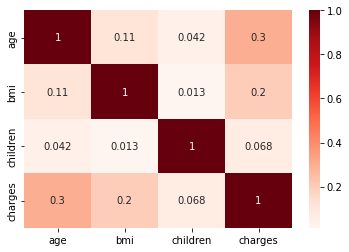

In [ ]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot = True)


In [ ]:
non_smoker_df = medical_df[medical_df.smoker =='no']
non_smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


Text(0.5, 1.0, 'Age vs charges')

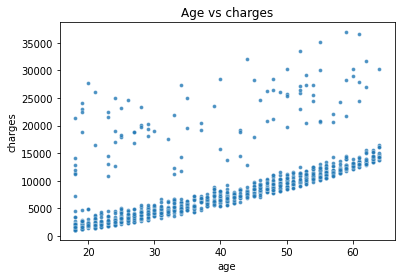

In [ ]:
fig = sns.scatterplot (data= non_smoker_df, x= 'age', y = 'charges', alpha =0.8, s =15)
plt.title( 'Age vs charges')

In [ ]:
def estimate_charges(age, w, b):
  return w*age + b
w = 50 
b =100
estimate_charges(30, w, b)  

1600

In [ ]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [ ]:
estimated_charges= estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0.5, 1.0, 'Ages vs estimated_charges')

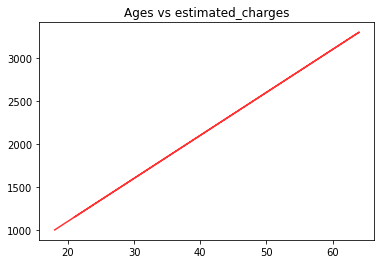

In [ ]:
plt.plot (ages, estimated_charges, 'r', alpha =0.8)
plt.title ('Ages vs estimated_charges')

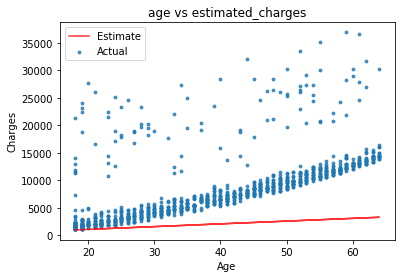

In [ ]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.8)
plt.scatter(ages, target,s=8, alpha=0.8)
plt.title('age vs estimated_charges')
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [ ]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  estimated_charges= estimate_charges(ages, w, b)
  plt.plot(ages, estimated_charges, 'r')
  plt.scatter(ages, target, alpha = 0.9, s= 8)
  plt.title('age vs estimated_charges')
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual']);

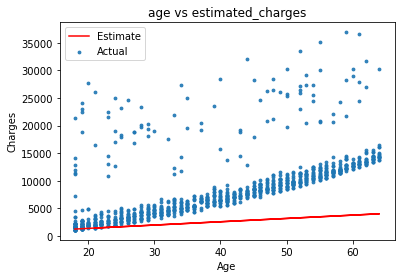

In [ ]:
try_parameters(60,200)

In [ ]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))
w=70
b=150
targets = non_smoker_df.charges
predictions= estimate_charges(ages, w, b)
rmse(targets, predictions)

7745.942727368145

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
inputs= non_smoker_df[['age']]
targets = non_smoker_df.charges
model.fit(inputs, targets)
model.predict(np.array([[23],
                       [37],
                       [61]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions= model.predict(inputs)
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [ ]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(targets, predictions)

4662.505766636391

In [ ]:
model.coef_


array([267.24891283])

In [ ]:
model.intercept_

-2091.4205565650864

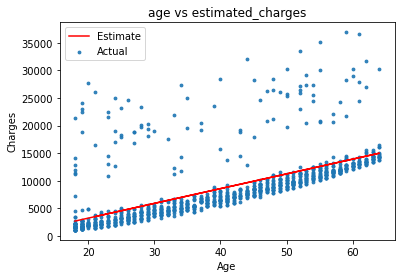

In [ ]:
try_parameters(model.coef_, model.intercept_)

In [ ]:
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636391


In [ ]:

inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)


predictions = model.predict(inputs)


loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.312835461297


In [ ]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [ ]:

inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)


predictions = model.predict(inputs)


loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038245


In [ ]:

inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']


model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)


loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125969


In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:

inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)


predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188077


In [ ]:
predictions

array([25587.42524891,  3880.94594512,  7158.62006921, ...,
        4398.7459491 ,  1615.83647369, 36793.67069541])

In [ ]:
input_cols = [['age'],['bmi'],['children'],['smoker']]
model.coef_

array([  257.84950728,   321.85140247,   473.50231561, 23811.3998446 ])

In [ ]:
model.intercept_

-12102.769362727897

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,257.849507
1,bmi,321.851402
2,children,473.502316
3,smoker,23811.399845
4,1,-12102.769363


In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_cols=['age', 'bmi','children']
scaler =StandardScaler()
scaler.fit(medical_df[numeric_cols])
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs


array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols=['smoker_code']
categorical_data = medical_df[cat_cols].values
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)


predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188077


In [ ]:
model.coef_

array([ 3621.42130554,  1961.97642374,   570.59025909, 23811.3998446 ])

In [ ]:
model.intercept_

8394.246213257175

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23811.399845
4,1,8394.246213
0,age,3621.421306
1,bmi,1961.976424
2,children,570.590259
